<a href="https://colab.research.google.com/github/Arush0113/CE784/blob/main/Arush_CE784_assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [456]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [457]:
#imported necessary packages and libraries
import matplotlib.pyplot as plt
from skimage import io, color
import os
import glob
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
% matplotlib inline


In [458]:
!pip install tensorflow_addons

In [459]:
from glob import glob
import math, random, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow.keras.backend as K
from tensorflow_addons.metrics import F1Score

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import KFold

# import efficientnet.tfkeras as efn

# from kaggle_datasets import KaggleDatasets

# import wandb
# from wandb.integration.keras import WandbCallback

In [460]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from google.colab.patches import cv2_imshow

In [461]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

In [462]:
#path of train and test data
train_path = '/content/drive/MyDrive/gaze_dataset/gaze_dataset/train'
test_path = '/content/drive/MyDrive/gaze_dataset/gaze_dataset/test'

In [463]:
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

--2022-04-13 18:01:58--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0.002s  

Last-modified header missing -- time-stamps turned off.
2022-04-13 18:01:58 (12.0 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2022-04-13 18:01:58--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubus

In [464]:
print("[INFO] loading model...")
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

[INFO] loading model...


In [465]:
!wget --no-check-certificate \
https://raw.githubusercontent.com/kipr/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml \
-O haarcascade_frontalface_default.xml

--2022-04-13 18:01:58--  https://raw.githubusercontent.com/kipr/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1254733 (1.2M) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>]   1.20M  --.-KB/s    in 0.05s   

2022-04-13 18:01:58 (22.2 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [1254733/1254733]



In [466]:
BATCH_SIZE = 32

In [512]:
data_dir = '/content/drive/MyDrive/gaze_dataset/gaze_dataset/train'
train_dataset = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            )

val_dataset = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  batch_size=BATCH_SIZE)

Found 2506 files belonging to 5 classes.
Found 2506 files belonging to 5 classes.
Using 501 files for validation.


In [513]:
image_batch, labels_batch = next(iter(train_dataset))

In [514]:
print(image_batch.shape)
print(image_batch)

(32, 256, 256, 3)
tf.Tensor(
[[[[ 31.328125  40.328125  23.328125]
   [ 33.5625    42.5625    25.5625  ]
   [ 33.984375  44.484375  27.484375]
   ...
   [251.42188  251.57812  247.      ]
   [250.14062  252.75     246.25    ]
   [248.       253.       246.      ]]

  [[ 25.46875   33.46875   18.625   ]
   [ 33.3125    41.3125    26.46875 ]
   [ 30.578125  40.828125  25.546875]
   ...
   [250.       252.       248.65625 ]
   [249.53125  252.23438  247.      ]
   [248.       253.       246.23438 ]]

  [[ 23.796875  29.796875  18.578125]
   [ 35.25      43.25      31.03125 ]
   [ 34.375     42.375     30.96875 ]
   ...
   [248.       252.85938  249.28125 ]
   [248.       253.       249.      ]
   [248.       253.       247.      ]]

  ...

  [[ 27.9375    16.9375    14.9375  ]
   [ 27.84375   18.1875    15.390625]
   [ 26.75      19.75      11.75    ]
   ...
   [130.75      67.75      33.9375  ]
   [125.265625  64.875     36.8125  ]
   [121.875     62.25      38.625   ]]

  [[ 28.109375  

400 400


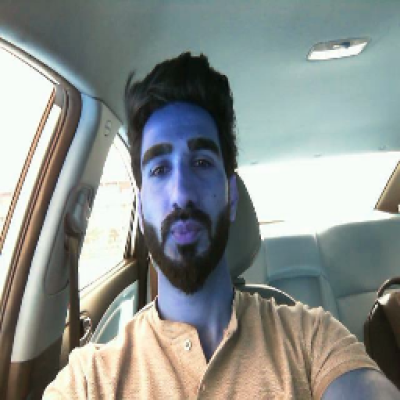

400 400


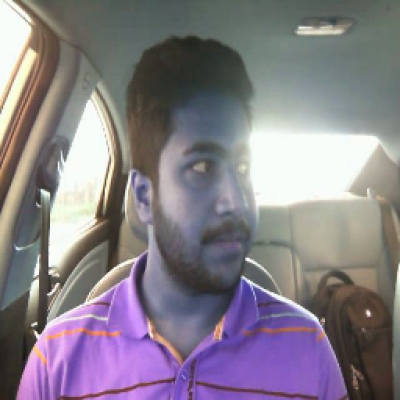

400 400


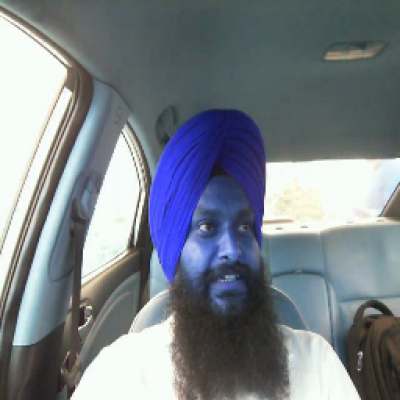

400 400


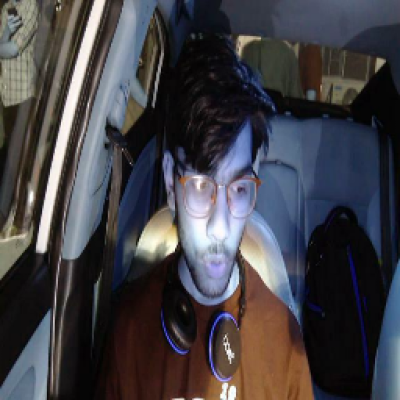

400 400


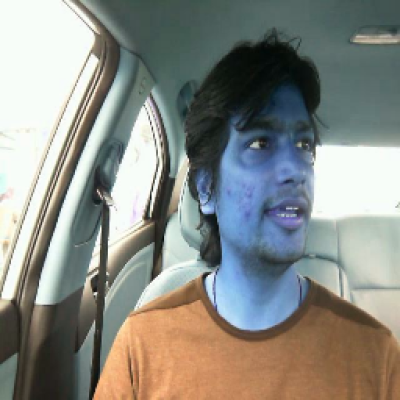

400 400


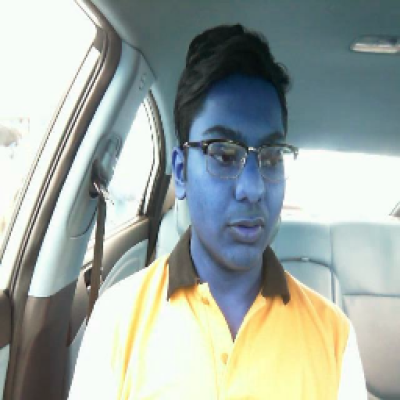

400 400


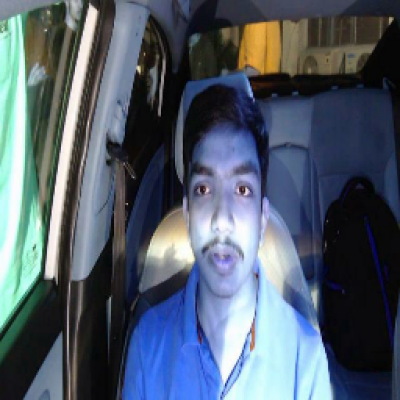

400 400


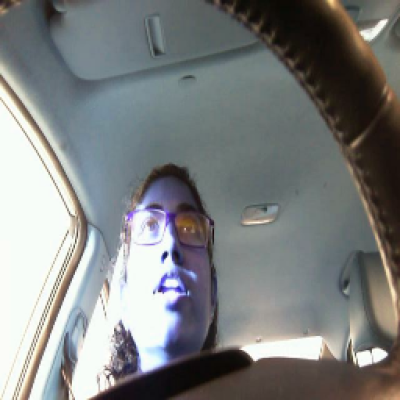

400 400


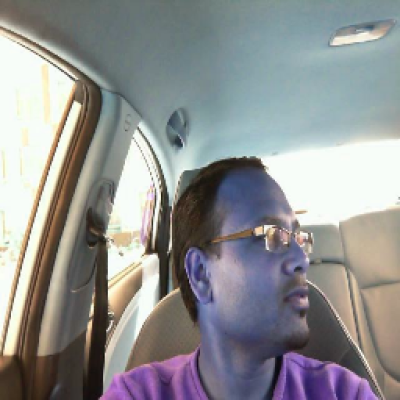

400 400


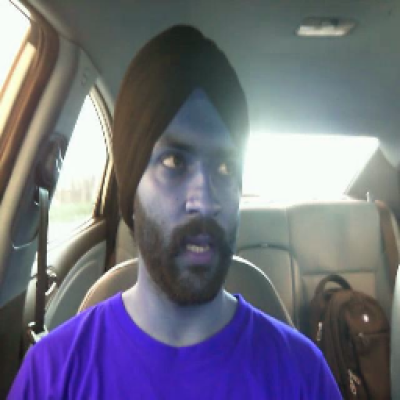

400 400


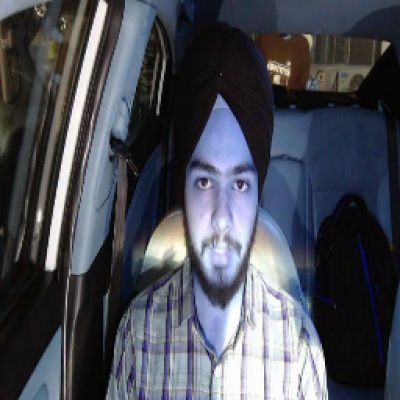

400 400


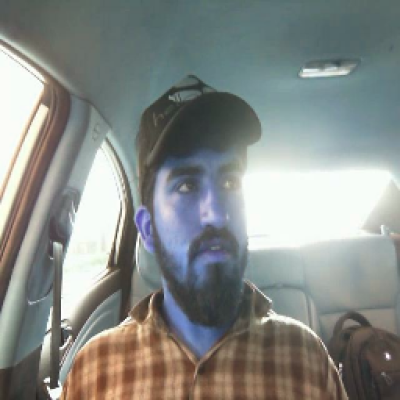

400 400


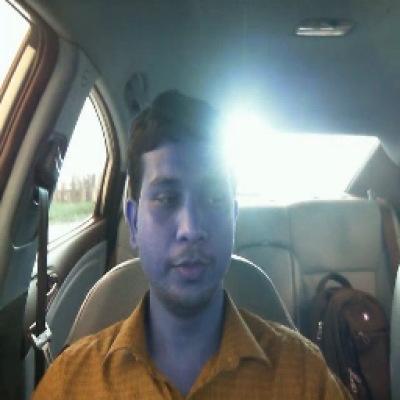

400 400


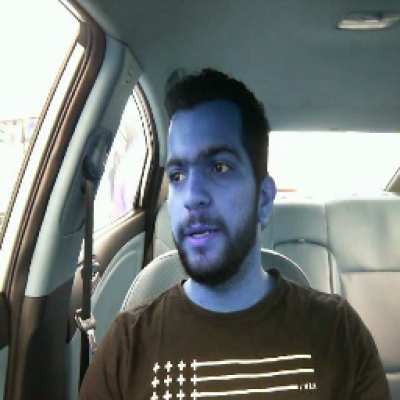

400 400


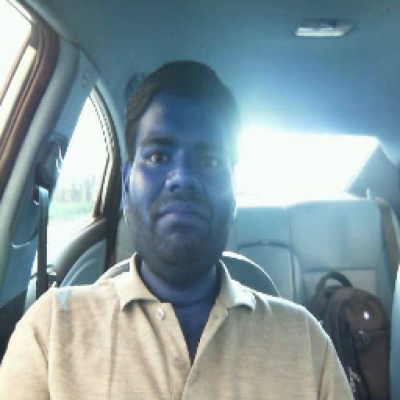

400 400


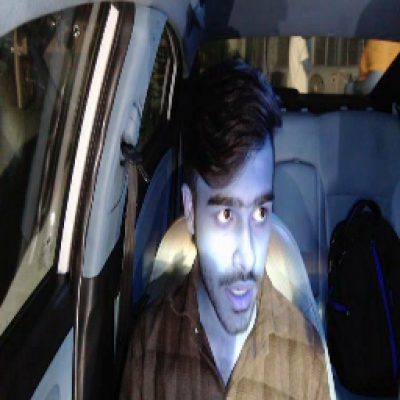

400 400


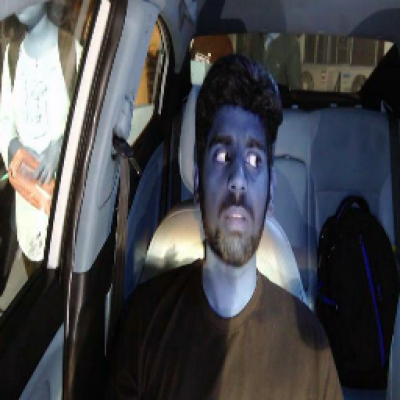

400 400


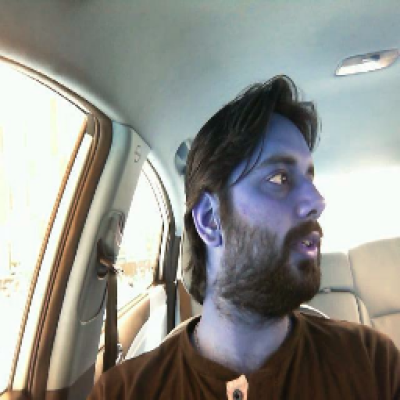

400 400


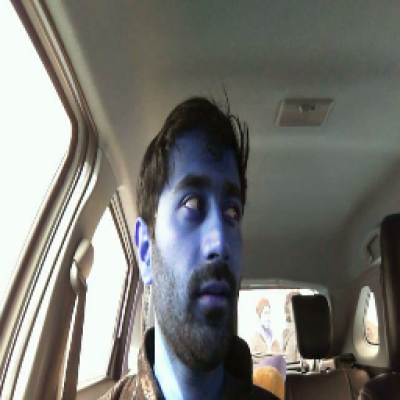

400 400


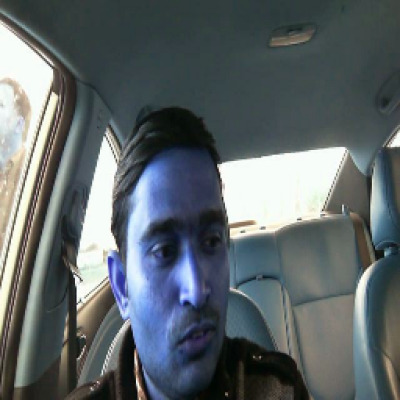

400 400


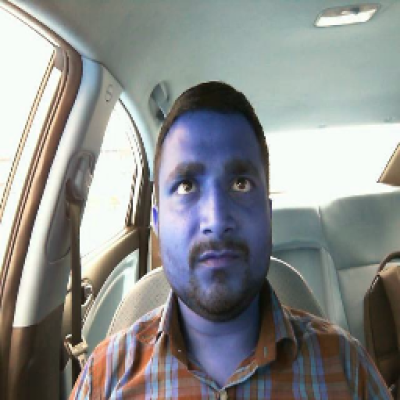

400 400


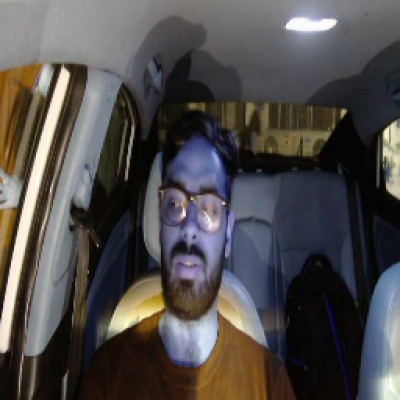

400 400


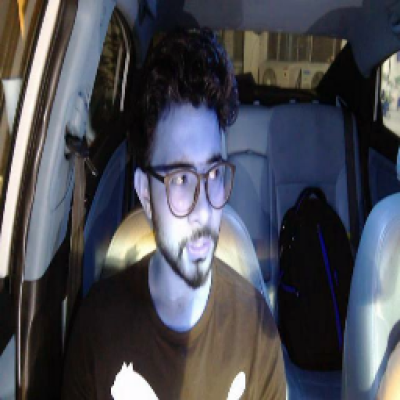

400 400


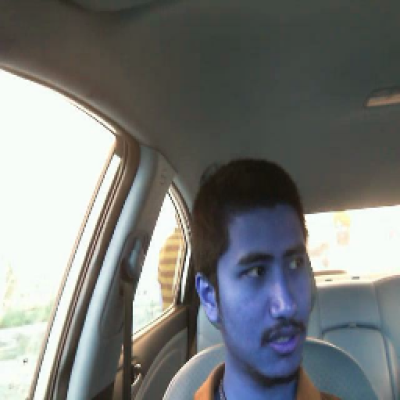

400 400


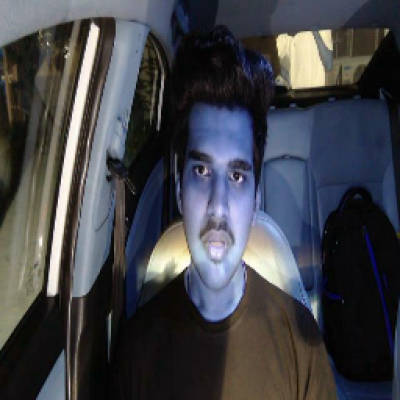

400 400


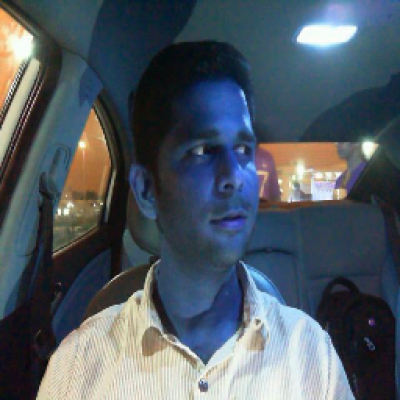

400 400


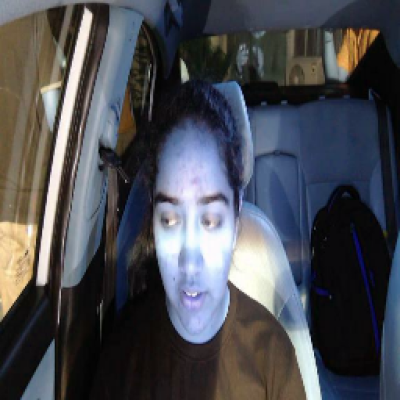

400 400


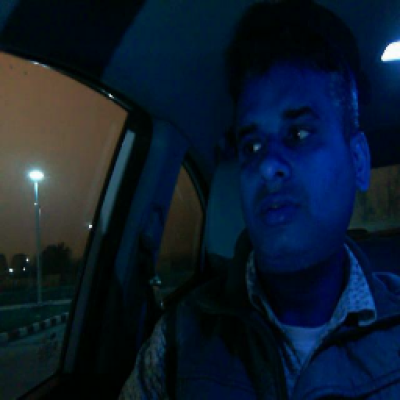

400 400


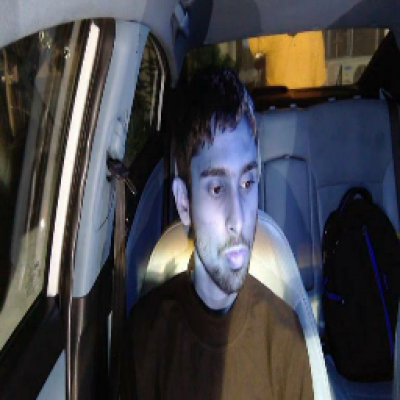

400 400


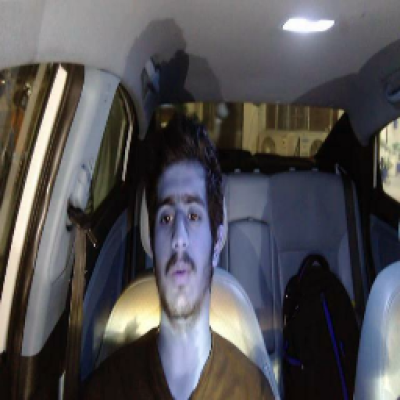

400 400


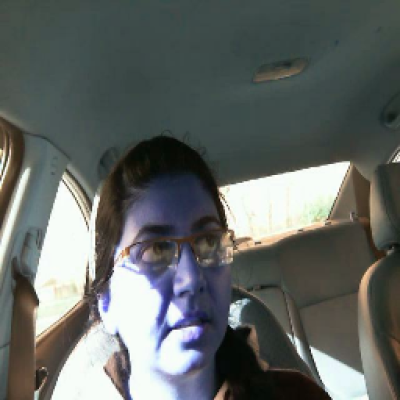

400 400


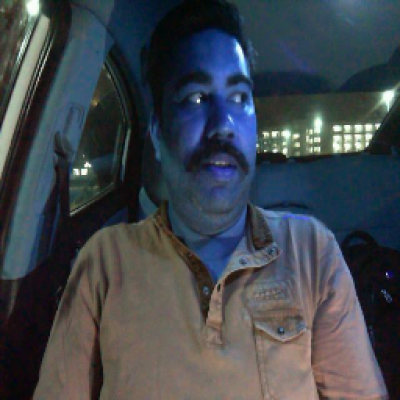

In [471]:
new_img_batch = []

for i in range(len(image_batch)):
  img = image_batch[i]
  img = np.array(img, dtype=np.uint8)
  img = imutils.resize(img, width=400)
  (h, w) = img.shape[:2]
  print(w,h)
  cv2_imshow(img)
  blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

  net.setInput(blob)
  detections = net.forward()
  for i in range(0, detections.shape[2]):

    # extract the confidence (i.e., probability) associated with the prediction
    confidence = detections[0, 0, i, 2]

    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence threshold
    if confidence > 0.5:
      # compute the (x, y)-coordinates of the bounding box for the object
      box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
      (startX, startY, endX, endY) = box.astype("int")
      this_img = img[startY:endY, startX:endX]
      this_img = cv2.resize(this_img, (100, 100),)
      new_img_batch.append(this_img)
      # draw the bounding box of the face along with the associated probability
      # text = "{:.2f}%".format(confidence * 100)
      # y = startY - 10 if startY - 10 > 10 else startY + 10
      # cv2.rectangle(img, (startX, startY), (endX, endY), (0, 0, 255), 2)
      # cv2.putText(img, text, (startX, y),
      #   cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

In [472]:
new_img_batch = np.array(new_img_batch)

In [473]:
new_img_batch.shape

(32, 100, 100, 3)

In [474]:
# for i in range(0, detections.shape[2]):

# 	# extract the confidence (i.e., probability) associated with the prediction
# 	confidence = detections[0, 0, i, 2]

# 	# filter out weak detections by ensuring the `confidence` is
# 	# greater than the minimum confidence threshold
# 	if confidence > 0.5:
# 		# compute the (x, y)-coordinates of the bounding box for the object
# 		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
# 		(startX, startY, endX, endY) = box.astype("int")
# 		# draw the bounding box of the face along with the associated probability
# 		text = "{:.2f}%".format(confidence * 100)
# 		y = startY - 10 if startY - 10 > 10 else startY + 10
# 		cv2.rectangle(img, (startX, startY), (endX, endY), (0, 0, 255), 2)
# 		cv2.putText(img, text, (startX, y),
# 			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

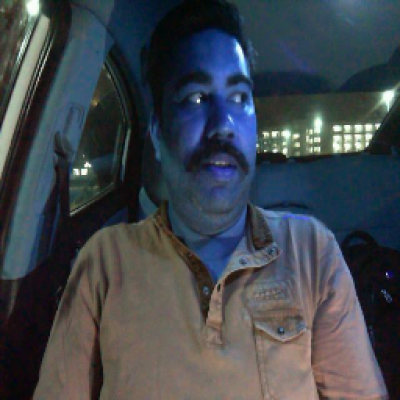

In [475]:
cv2_imshow(img)

In [476]:
import cv2
cv2.__version__

'4.1.2'

In [477]:
img = image_batch[0]
img = np.array(img)

In [ ]:
print(labels_batch.shape)
print(labels_batch)

(32,)
tf.Tensor([4 3 0 2 1 4 2 1 3 4 1 1 2 4 3 1 4 4 1 2 1 2 1 1 1 4 1 4 1 2 1 0], shape=(32,), dtype=int32)


In [482]:
new_img_batch.shape

(32, 100, 100, 3)

In [500]:
labels_batch = np.array(labels_batch)
from tensorflow.keras.utils import to_categorical
labels_batch = to_categorical(labels_batch, 5)


In [494]:
new_img_batch = np.array(new_img_batch)

In [507]:
new_img_batch = new_img_batch.astype('float32')
labels_batch = labels_batch.astype('float32')

In [508]:
labels_batch

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [511]:
num_classes = 5
model = tf.keras.Sequential([
  
  # tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout((0.2)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(num_classes,activation = 'softmax')
])

model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])

model.fit(
  new_img_batch, labels_batch,
  epochs=20,
)

Epoch 1/20
1/1 [==============================] - 1s 915ms/step - loss: 2.2461 - accuracy: 0.1875
Epoch 2/20
1/1 [==============================] - 0s 41ms/step - loss: 1.5571 - accuracy: 0.3438
Epoch 3/20
1/1 [==============================] - 0s 39ms/step - loss: 0.7768 - accuracy: 0.7500
Epoch 4/20
1/1 [==============================] - 0s 42ms/step - loss: 0.8213 - accuracy: 0.7812
Epoch 5/20
1/1 [==============================] - 0s 44ms/step - loss: 0.4416 - accuracy: 0.9062
Epoch 6/20
1/1 [==============================] - 0s 40ms/step - loss: 0.3987 - accuracy: 0.8438
Epoch 7/20
1/1 [==============================] - 0s 47ms/step - loss: 0.2608 - accuracy: 0.8750
Epoch 8/20
1/1 [==============================] - 0s 40ms/step - loss: 0.2138 - accuracy: 0.9062
Epoch 9/20
1/1 [==============================] - 0s 40ms/step - loss: 0.1564 - accuracy: 0.9688
Epoch 10/20
1/1 [==============================] - 0s 41ms/step - loss: 0.1010 - accuracy: 1.0000
Epoch 11/20
1/1 [===========

In [ ]:
new_img_batch